# Chapter 04 신경망 학습

**학습**이란 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것이다. **손실함수**는 신경망이 학습할 수 있도록 해 주는 **지표**이며, 이 손실 함수의 결과값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 학습의 목표이다.

## 4.1 데이터에서 학습한다!

선형 분리 가능 문제는 유한 번의 학습을 통해 풀 수 있다는 사실이 **퍼셉트론 수렴 정리**로 증명되었다. 하지만 비선형 분리 문제는 자동으로 학습할 수 없다.

### 4.1.1 데이터 주도 학습

딥러닝을 **종단간 기계학습**(end-to-end machine learning)이라고도 한다. 여기서 종단간은 '처음부터 끝까지'라는 의미로, 데이터(입력)에서 목표한 결과(출력)를 사람의 개입 없이 얻는다는 뜻을 담고 있음. 신경망은 모든 문제를 주어진 데이터 그대로를 입력 데이터로 활용해 'end-to-end'로 학습할 수 있음

### 4.1.2 훈련 데이터와 시험 데이터

## 4.2 손실 함수

신경망 학습에서는 현재의 상태를 '하나의 지표'로 표현한다.그리고 그 지표를 가장 좋게 만들어주는 가중치 매개변수의 값을 탐색한다. 신경망은 '하나의 지표'를 기준으로 최적의 매개변수 값을 탐색한다. 신경망 학습에서 사용하는 지표는 **손실 함수**(loss function)라고 한다. 이 손실 함수는 임의의 함수를 사용할 수도 있지만 일반적으로는 평균 제곱 오차와 교차 엔트로피 오차를 사용한다.

* 손실 함수는 신경망 성능의 '나쁨'을 나타내는 지표로, 현재의 신경망이 훈련 데이터를 얼마나 잘 처리하지 '못'하느냐를 나타낸다. 

### 4.2.1 평균 제곱 오차

가장 많이 쓰이는 손실 함수는 **평균 제곱 오차**(mean squared error, MSE)

<center>$E = \frac{1}{2}\sum_{k}(y_{k}-t_{k})^2$</center>

여기서 $y_k$는 신경망의 출력(신경망의 추정 값), $t_k$는 정답 레이블, k는 데이터의 차원 수를 나타낸다. 

In [1]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

이미지가 0일 확률은 0.1, 1일 확률은 0.05, 2일 확률은 0.6, 정답 레이블에서 인덱스 2에 해당하는 값이 1

평균 제곱 오차

In [2]:
import numpy as np
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t) ** 2)

In [3]:
# 정답은 '2'
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [4]:
# 예1 : '2'일 확률이 가장 높다고 추정함 (0.6)
y = [0.1 ,0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.097500000000000031

In [5]:
# 예2 : '7'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.59750000000000003

### 4.2.2 교차 엔트로피 오차

교차 엔트로피 오차의 수식

<center>$E = - \sum_{k}t_{k}\log y_{k}$

여기에서 log는 밑이 e인 자연로그($log_e$), $y_{k}$는 신경망의 출력, $t_{k}$는 정답 레이블이다. 여기서 $t_k$는 정답에 해당하는 인덱스의 원소만 1이고 나머지는 0이다.(원-핫 인코딩). 그래서 이 식은 실질적으로 정답일 때의 추정($t_k$가 1일때의 $y_k$)의 자연로그를 계산하는 식이 된다. 즉 교차 엔트로피의 오차는 정답일 때의 출력이 전체 값을 정하게 된다. 아래 그림처럼 출력이 커질수록 0에 다가가다가, 그 출력이 1일때 0이 된다.

In [6]:
import matplotlib.pyplot as plt

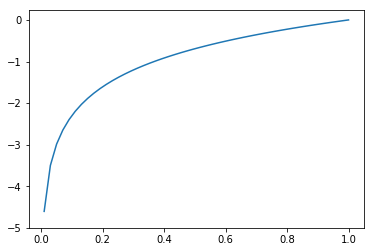

In [7]:
x = np.linspace(0.01, 1)
y = np.log(x)
plt.plot(x, y)
plt.yticks([-5, -4, -3, -2, -1, 0])
plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.show()

교차 엔트로피 공식

In [8]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

np.log() 함수에 0을 입력하면 마이너스 무한대가 되기 때문에, 아주 작은 갑승ㄹ 더해서 절대 0이 되지 않도록 한다.

In [9]:
t = [0,     0,   1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

In [10]:
cross_entropy_error(np.array(y), np.array(t))

0.51082545709933802

In [11]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

In [12]:
cross_entropy_error(np.array(y), np.array(t))

2.3025840929945458

첫번째 예는 정답일 때의 출력이 0.6인 경우로, 이때의 교차 엔트로피 오차는 약 0.51이다. 그 다음은 정답일 때의 출력이 더 낮은 0.1의 경우로, 이때의 교차 엔트로피 오차는 무려 2.3이다. 즉. 결과(오차 값)가 더 작은 첫 번째 추정이 정답일 가능성이 높다고 판단한 것이다.

### 4.2.3 미니배치 학습

모든 훈련 데이터를 대상으로 손실 함수 값을 구해야 한다. 즉, 훈련 데이터가 100개 있으면 그로부터 계산한 100개의 손실 함수 값들의 합을 지표로 삼는 것이다. 위의 식은 데이터 하나에 대한 손실 함수만 생각해온 것이다. 훈련 데이터 모두에 대한 손실 함수의 합을 구하는 방법을 생각해 보면 다음과 같다.

<center>$E = -\frac{1}{N}\sum_{n}\sum_{k}t_{nk}\log_{nk}$

이때 데이터가 N개라면, $t_{nk}$는 n번째 데이터의 k번째 값을 의미한다. ($y_{nk}$는 신경망의 출력, $t_{nk}$는 정답 레이블). 데이터 하나에 대한 손실 함수를 N개의 데이터로 확장하고 마지막에 N으로 나누어 정규화한 것이다. N으로 나눔으로써 '평균 손실 함수'를 구할 수 있다.

모든 데이터를 대상으로 일일이 손실 함수를 계산하는 것은 너무 오래 걸리기 때문에, 데이터 일부를 추려 '근사치'로 이용할 수 있다. 이를 **미니배치**라 한다. 가령 60,000장의 훈련 데이터 중에서 100장을 무작위로 뽑아 그 100장만을 활용하여 학습하는 것이다. 이러한 학습 방식을 **미니배치 학습** 이라고 한다.

In [13]:
import sys, os
sys.path.append('../deep_learning_from_scratch_org/deep-learning-from-scratch/')
import numpy as np
from dataset.mnist import load_mnist

In [14]:
(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

In [15]:
print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000, 10)

(60000, 784)
(60000, 10)


훈련 데이터는 60,000개이고, 입력 데이터는 784열(원래 28 X 28)이다. 또, 정답 레이블은 10줄짜리 데이터이다.

훈련 데이터에서 무작위로 10장 빼내기

In [16]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)

In [17]:
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [18]:
np.random.choice(60000, 10)

array([46432, 48836, 24714, 22944, 54881, 47349,  3101,  5691, 28400, 53300])

**Note** TV시쳥률도 전 세대의 TV가 아니라 선택된 일부 가구의 TV만을 대상으로 집계한다. 이것이 전체 시청률과 정확히 일치하진 않겠지만, 전체의 대략적인 값으로 사용할 수 있다. 이 시청률 이야기와 마찬가지로 미니배치의 손실 함수도 일부 표본 데이터로 전체를 비슷하게 계측한다. 즉, 전체 훈련 데이터의 대표로서 무작위로 선택한 작은 덩어리(미니배치)를 사용하는 것이다.

### 4.2.4 (배치용) 교차 엔트로피 오차 구현하기

In [19]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size) #size는 t의 원소의 갯수
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y)) / batch_size

y는 신경망의 출력, y는 정답 레이블. y가 1차원이라면, 즉 데이터 하나당 교차 엔트로피 오차를 구하는 경우는 reshape함수로 데이터의 형상을 바꿔준다. 그리고 배치의 크기로 나눠 정규화하고 이미지 1장당 평균 교차 엔트로피 오차를 계산한다.

정답 레이블이 원-핫 인코딩이 아니라 '2'나 '7'등의 숫자 레이블로 주어졌을 때의 교차 엔트로피 오차는 다음과 같다.

In [20]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

이 구현에서는 원-핫 인코딩일때 t가 0인 원소는 교차 엔트로피 오차도 0이므로, 그 계산은 무시해도 좋다는 것이 핵심이다. 즉, 정답에 해당하는 신경망의 출력만으로 교차 엔트로피 오차를 계산할 수 있다. 그래서 원핫 인코딩시 t\* np.log(y) 였던 부분을 레이블 표현일 때에는 np.log(y[np.arange(batch_size), t])로 구현한다. 

batch_size가 5이면 np.arange(batch_size)는 [0, 1, 2, 3, 4] 라는 넘파이 배열을 생성한다. t에는 레이블이 [2, 7, 0, 9, 4]와 같이 저장되어 있으므로 y[np.arange(batch_size), t]는 각 데이터의 정답 레이블에 해당하는 신경망의 출력을 추출한다.

### 4.2.5 왜 손실 함수를 설정하는가?

신경망 학습에서는 최적의 매개변수(가중치와 편향)을 탐색할 때 손실 함수의 값을 가능한 한 작게 하는 매개변수 값을 찾는다. 이때 매개변수의 미분(정확히는 기울기)을 계산하고, 그 미분 값을 단서로 매개변수의 값을 서서히 갱신하는 과정을 반복한다.

가중치 매개변수의 손실 함수의 미분이란 '가중치 매개변수의 값을 아주 조금 변화시켰을때, 손실 함수가 어떻게 변하냐' 라는 의미이다. 만약 이 미분 값이 음수면 그 가중치 매개변수를 양의 방향으로 변화시켜 손실 함수의 값을 줄일 수 있다. 반대로 미분 값이 양수면, 그 가중치 매개변수를 음의 방향으로 변화시켜 손실 함수의 값을 줄일 수 있다. 그러나 미분 값이 0이면 가중치 매개변수를 어느 쪽으로 움직여도 손실 함수의 값은 달라지지 않기 때문에 가중치 매개변수의 갱신이 멈춘다.

정확도를 지표로 사용하면 그 미분 값이 대부분의 장소에서 0이 되어서 매개변수를 갱신할 수 없게 된다.

가령 정확도가 지표라면, 가중치 매개변수의 값을 조금 바꾼다고 해도 정확도는 그대로 32%가 되거나 개선된다 하더라도 그 값은 32.0123%와 같은 연속적인 변화보다는 33%, 34% 처럼 불연속적인 띄엄띄엄한 값으로 바뀌어버린다.

반면 손실함수가 지표라면, 매개변수의 값이 조금만 변하더라도 그에 반응하여 손실 함수의 값도 연속적으로 변화한다.

즉 정확도는 매개변수의 미소한 변화에는 거의 반응을 보이지 않고, 반응이 있더라도 그 값이 불연속적으로 갑자기 변화한다. 이는 '계단 함수'를 활성화 함수로 이용하지 않는 것과도 비슷하다. 계단 함수의 미분은 대부분의 장소(0 이외의 곳)에서 0이 된다. 따라서 계단 함수를 이용하면 손실 함수를 지표로 삼는 것이 아무 의미가 없어 진다. 매개변수의 작은 변화가 주는 파자을 계단 함수가 말살하여 손실 함수의 값에는 아무런 변화가 나타나지 않기 때문이다.

계단 함수는 한순간만 변화를 일으키지만, 시그모이드 함수의 미분(접선)은 같이 출력(세로축의 값)이 연속적으로 변하고 기울기도 연속적으로 변한다. 즉, 시그모이드 함수의 미분은 어느 장소라도 0이 되지는 않는다. 이렇게 기울기가 0이 되지 않는 덕분에 신경망이 올바르게 학습할 수 있다.

## 4.3 수치 미분

경사법에서는 기울기(경사) 값을 기준으로 나아갈 방향을 정한다.

### 4.3.1 미분

미분은 한순간의 변화량을 표시한 것이다.

<center>$\frac{df(x)}{dx} = lim_{h\rightarrow0}\frac{f(x + h) - f(x)}{h}$ [식 4.4]

미분의 나쁜 구현 예. 

In [21]:
def numerical_diff(f, x):
    h = 10e-50
    return (f(x + h) - f(x)) / h

In [22]:
np.float32(1e-50)

0.0

위의 방법은 **반올림 오차**(rounding error)문제를 일으킴. h를 $10^{-4}$ 정도로 줄여줄 수 있다. 또한 오차를 줄이기 위해서 (x+h)와 (x-h)일 때의 함수 f의 차분을 계산하는 방법을 써서 개선시킬 수 있다. x를 중심으로 그 전후의 차분을 계산한다는 의미에서 중심 차분, 중앙 차분이라고 부른다. 한편 x+h와 x의 차분은 전방 차분이라 부른다.

개선된 미분

In [23]:
def numerical_diff(f, x):
    h = 1e-4 #0.0001
    return (f(x+h) - f(x-h)) / (2*h)

이렇게 아주 작은 차분으로 미분하는 것을 수치 미분이라고 한다. 한편 수식을 전개해 미분하는것을 **해석적**이라는 말을 이용해서 '해석적 해' 혹은 '해석적으로 미분하다'등으로 표현한다. 가령 y = $x^{2}$의 미분은 해석적으로는 $\frac{dy}{dx} = 2x$로 풀어낼 수 있다. 그래서 x = 2일때 y의 미분은 4가 된다. 해석적 미분은 오차를 포함하지 않는 '진정한 미분'의 값을 구해준다.

### 4.3.2 수치 미분의 예

<center>$ y = 0.01x^{2} + 0.1x$ [식 4.5]

In [24]:
def function_1(x):
    return 0.01 * x ** 2 + 0.1 * x

In [25]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib

In [26]:
# matplotlib.rcParams['font.family'] = 'sans-serif'
# matplotlib.rcParams['font.family'] = 'NanumGothic'

In [27]:
matplotlib.rcParams['font.family']

['sans-serif']

In [28]:
matplotlib.matplotlib_fname()

'/root/.pyenv/versions/3.5.3/envs/hrc/lib/python3.5/site-packages/matplotlib/mpl-data/matplotlibrc'

In [29]:
import matplotlib.font_manager as fm

In [30]:
fm.get_fontconfig_fonts()

['/usr/share/fonts/NanumFont/NanumBrush.ttf',
 '/usr/share/fonts/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/NanumFont/NanumGothicExtraBold.ttf',
 '/usr/share/fonts/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/liberation/NanumGothic.ttf',
 '/usr/share/fonts/liberation/LiberationSans-Italic.ttf',
 '/usr/share/fonts/NanumFont/NanumPen.ttf',
 '/usr/share/fonts/NanumFont/NanumGothicBold.ttf',
 '/usr/share/fonts/liberation/LiberationSans-Bold.ttf',
 '/usr/share/fonts/NanumFont/NanumMyeongjoExtraBold.ttf',
 '/usr/share/fonts/NanumFont/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/NanumFont/NanumGothic.ttf',
 '/usr/share/fonts/NanumFont/NanumMyeongjo.ttf']

In [31]:
matplotlib.matplotlib_fname()

'/root/.pyenv/versions/3.5.3/envs/hrc/lib/python3.5/site-packages/matplotlib/mpl-data/matplotlibrc'

In [32]:
font_location = '/usr/share/fonts/NanumFont/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()

In [33]:
matplotlib.font_manager.findfont('/usr/share/fonts/NanumFont/NanumGothic.ttf')

/root/.pyenv/versions/3.5.3/envs/hrc/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['/usr/share/fonts/NanumFont/NanumGothic.ttf'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


'/root/.pyenv/versions/3.5.3/envs/hrc/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'

In [34]:
font_name

'NanumGothic'

In [35]:
matplotlib.rc('font', family=font_name)

In [36]:
matplotlib.rcParams['font.family']

['NanumGothic']

/root/.pyenv/versions/3.5.3/envs/hrc/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


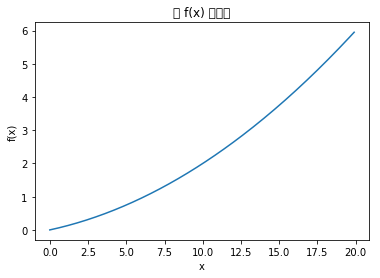

In [37]:
x = np.arange(0.0, 20.0, 0.1) # 0에서 20까지 0.1 간격의 배열 x를 만든다.
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("식 f(x) 그래프")
plt.plot(x, y)
plt.show()

x = 5일때와 10일때 이 함수의 미분을 계산

In [38]:
numerical_diff(function_1, 5)

0.1999999999990898

In [39]:
numerical_diff(function_1, 10)

0.2999999999986347

### 4.3.3 편미분

<center>$f(x_{0}, x_{1}) = x_{0}^{2} + x_{1}^{2}$ [식 4.6]

구현

In [40]:
def function_2(x):
    return x[0] ** 2 + x[1] ** 2

## 4.4 기울기

$x_{0}$과 $x_{1}$의 편미분을 동시에 계산하고 싶다고 가정하자. 가령 $x_{0} = 3, x_{1} = 4$ 일때 ($x_{0}$, $x_{1}$) 양쪽의 편미분을 묶어서 ($\frac{\partial f}{\partial x_{0}}$, $\frac{\partial f}{\partial x_{1}}$) 을 계산한다고 하자. 이때 ($\frac{\partial f}{\partial x_{0}}$, $\frac{\partial f}{\partial x_{1}}$) 처럼 모든 변수의 편미분을 벡터로 정리한 것을 **기울기**$^{gradient}$ 라고 한다.

In [41]:
def numerical_gradient(f, x):

    h = 1e-4
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad

In [42]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([ 6.,  8.])

In [43]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([ 0.,  4.])

In [44]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([ 6.,  0.])

이처럼 $(x_{0}, x_{1})$의 각 점에서 기울기를 계산할 수 있다. 앞의 예에서는 점 (3, 4)의 기울기는 (6, 8). 점 (0, 2)의 기울기는 (0, 4)이다. 기울기 그림을 보면 기울기는 함수의 '가장 낮은 장소(최소값)'을 가르키고 있다. '가장 낮은 곳'에서 멀어질수록 화살표의 크기가 커지고 있다.

/root/.pyenv/versions/3.5.3/envs/hrc/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/root/.pyenv/versions/3.5.3/envs/hrc/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


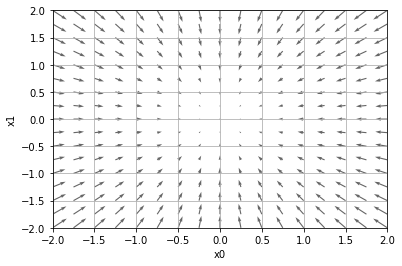

In [45]:
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()


그림에서 기울기는 각 지점에서 낮아지는 방향을 나타내지만, 실제로는 반드시 그렇다고 할 수 없다. 기울기는 각 지점에서 낮아지는 방향을 가르키고 있다. 더 정확히 말하자면 **기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향**이다. 

### 4.4.1 경사법(경사 하강법)

경사법은 현 위치에서 기울어진 방향으로 일정 거리만큼 이동하고 마찬가지로 기울기를 구한다. 또 기울어진 방향으로 나아가기를 반복한다. 이렇게 해서 함수의 값을 점차 줄이는 것이 **경사법**(gradient method)이다. 

<center>$x_{0} = x_{0} - \eta\frac{\partial f}{\partial x_{0}}$<br>
$x_{1} = x_{1} - \eta\frac{\partial f}{\partial x_{1}}$ </center>
                                      <div style="text-align: right"> [식 4.7] </div>

[식 4.7]의 $\eta$기호(에타)는 갱신하는 양을 나타낸다. 이를 신경망에서는 **학습률**(learning rate)라고 한다. 이 학습률은 한 번의 학습으로 얼마만큼 학습해야 할지, 즉 매개변수 값을 얼마나 갱신해야 할지를 정한다.이 갱신하는 단계를 여러 번 반복하면서 서서히 함수의 값을 줄인다. 또한 학습률이 작거나 크면 '좋은 장소'를 찾아갈 수 없다.

경사 하강법 구현

In [46]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

인수 f는 최적화하려는 함수, init_x는 초깃값, lr은 learning rate를 의미하는 학습률, step_num은 경사법에 따른 반복 횟수를 뜻함. 함수의 기울기는 numerical_gradient(f, x)로 구하고, 그 기울기에 학습률을 곱한 값으로 갱신하는 처리를 step_num 반복한다.

In [47]:
def function_2(x):
    return x[0] ** 2 + x[1] ** 2

In [48]:
init_x = np.array([-3.0, 4.0])

In [49]:
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([ -6.11110793e-10,   8.14814391e-10])

거의 (0.0)에 가깝다. 진정한 최소값은 (0, 0)이므로 경사법으로 거의 정확한 결과를 얻은 것이다.

In [50]:
# 학습률이 너무 큰 예: lr=10.0
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr=10.0, step_num=100)

array([ -2.58983747e+13,  -1.29524862e+12])

In [51]:
# 학습률이 너무 작은 예 : lr=1e-10
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

학습률이 너무 크면 큰 값으로 발산해 버린다. 반대로 너무 자긍면 거의 갱신되지 않은 채 끝나버린다.

학습률 같은 매개변수를 **하이퍼파라미터**(hyper parameter, 초매개변수)라고 부른다. 이는 가중치와 편향 같은 신경망의 매개변수와 대비된다. 신경망의 가중치 매개변수는 훈련 데이터와 학습 알고리즘에 의해 '자동'으로 획득되는 반면, 학습률 같은 하이퍼파라미터는 사람이 직접 설정해야 한다.

### 4.4.2 신경망에서의 기울기

기울기는 가중치 매개변수에 대해 손실 함수의 기울기이다. 예를 들어 형상이 2 X 3, 가중치가 **W**, 손실 함수가 $L$인 신경망을 생각해 보자. 이 경우 경사는 $\frac{\partial L}{\partial W}$ 로 나타날 수 있다.

$$W =
 \begin{pmatrix}
  w_{11} & w_{21} & w_{31} \\
  w_{12} & w_{22} & w_{32} \\
 \end{pmatrix}$$
 
 
 $$\frac{\partial L}{\partial W} =
 \begin{pmatrix}
  w_{11} & w_{21} & w_{31} \\
  w_{12} & w_{22} & w_{32} \\
 \end{pmatrix}$$
 
 <div style="text-align: right"> [식 4.8] </div>

$\frac{\partial L}{\partial W}$ 의 각 원소는 각각의 원소에 관한 편미분이다. 예를 들어 1행 1번째 원소인 $\frac{\partial L}{\partial w_{11}}$ 은 $w_{11}$을 조금 변경했을때 손실 함수 L이 얼마나 변화하느냐를 나타낸다.

간단한 신경망 예

In [52]:
import sys, os
sys.path.append('/root/entropylab/hrc/deep_learning_from_scratch_org/deep-learning-from-scratch')
import numpy as np

In [53]:
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

In [54]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [55]:
np.random.randn(2, 3)

array([[-0.02136448, -0.65888172, -1.49861287],
       [ 0.85633501, -1.24769901,  1.03065711]])

인수 x는 입력 데이터, t는 정답 레이블

In [56]:
net = simpleNet()

In [57]:
print(net.W)

[[ 0.94205491  2.00218723 -0.44365259]
 [ 0.11622554 -0.59436786  0.83999679]]


In [58]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[ 0.66983593  0.66638126  0.48980555]


In [59]:
np.argmax(p) #최대값의 인덱스

0

In [60]:
t = np.array([0, 0, 1]) # 정답 레이블

In [61]:
net.loss(x, t)

1.2209415606587606

In [62]:
t = np.array([1, 0, 0]) # 정답 레이블
net.loss(x, t)

1.0409111886878426

기울기 구하기

In [63]:
def f(W):
    return net.loss(x, t)

In [64]:
dW = numerical_gradient(f, net.W)

In [65]:
print(dW)

[[-0.38812034  0.21114895  0.17697139]
 [-0.58218051  0.31672342  0.26545709]]


In [66]:
print(np.array([[-0.24718447,  0.05855661,  0.18862786], [-0.3707767,   0.08783491,  0.28294179]]))

[[-0.24718447  0.05855661  0.18862786]
 [-0.3707767   0.08783491  0.28294179]]


**W**의 $w_{11}$은 대략 -0.24이다. 이는 $w_{11}$을 h만큼 늘리면 손실 함수의 값은 약 0.24h만큼 감소한다는 뜻이다. 마찬가지로 $w_{32}$을 h만큼 늘리면 손실 함수의 값은 약 0.28만큼 증가한다는 것이다. 그래서 손실 함수를 줄인다는 관점에서는 $w_{32}$는 음의 방향으로 갱신하고 $w_{11}$은 양의 방향으로 갱신해야 함을 알 수 있다. 또, 한 번에 갱신되는 양에는 $w_{32}$ 가 $w_{11}$보다 크게 기여한다는 사실을 알 수 있다.

간단한 함수는 람다 lambda 기법을 쓰면 편하다.

In [67]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

## 4.5 학습 알고리즘 구현하기

**전제**<br>
신경망에는 적응 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 '학습' 이라 한다. 신경망 학습은 다음과 같이 4단계로 수행된다.

**1단계 - 미니배치 **<br>
훈련 데이터 중 일부를 무작위로 가져온다. 이렇게 선별한 데이터를 미니배치라고 하고, 그 미니배치의 손실 함수 값을 줄이는 것이 목표다.

**2단계 - 기울기 산출 **<br>
미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다. 기울기는 손실 하수의 값을 가장 작게 하는 방향을 제시한다.

**3단계 - 매개변수 갱신 **<br>
가중치 매개변수를 기울기 방향으로 아주 조금씩 갱신한다.

**4단계 - 반복 **<br>
1~3단계를 반복한다.

이것이 신경망 학습이 이뤄지는 순서이다. 경사 하강법으로 매개변수를 갱신하는 방법이며, 이때 데이터를 무작위로 선정하기 때문에 **확률적 경사 하강법**(stochastic gradient descent, SGD)라 부른다. '확률적으로 무작위로 골라낸 데이터'에 대해 수행하는 경사 하강법이라는 뜻이다. 

### 4.5.1 2층 신경망 클래스 구현하기
처음에는 2층 신경망을 하나의 클래스로 구현하는 것부터 시작한다. 이 클래스의 이름은 TwoLayerNet이다.

In [68]:
import sys, os
sys.path.append('../deep_learning_from_scratch_org/deep-learning-from-scratch/')
from common.functions import *
from common.gradient import numerical_gradient

In [69]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y==t) / float(x.shape[0])
        return accuracy
    
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [70]:
net = TwoLayerNet(input_size = 784, hidden_size=100, output_size=10)

In [71]:
net.params['W1'].shape

(784, 100)

In [72]:
net.params['b1'].shape

(100,)

In [73]:
net.params['W2'].shape

(100, 10)

In [74]:
net.params['b2'].shape

(10,)

In [75]:
x = np.random.rand(100, 784)
y = net.predict(x)

grads 변수에서는 params 변수에 대응하는 각 매개변수의 기울기가 저장된다. 예를 들어 다음과 같이 numerical_gradient() 메서드를 사용해 기울기를 계산하면 grads 변수에 기울기 정보가 저장된다.

### 4.5.2 미니배치 학습 구현하기

In [84]:
import numpy as np
sys.path.append('../deep_learning_from_scratch_org/deep-learning-from-scratch/ch04/')
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

In [85]:
(x_train, t_train), (x_test, t_test ) = load_mnist(normalize=True, one_hot_label=True)

In [86]:
train_loss_list = []

In [87]:
# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

In [88]:
network = TwoLayerNet(input_size = 784, hidden_size=50, output_size=10)

In [89]:
for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

### 4.5.3 시험 데이터로 평가하기

훈련 데이터의 손실 함수 값이 작아지는 것은 신경망이 잘 학습하고 있다는 방증이지만, 이 결과만으로는 다른 데이터셋에서도 비슷한 실력을 발휘하는지 확실하지 않다.

**Note** <br>**에폭**(epoch)은 하나의 단위이다. 1에폭은 학습에서 훈련 데이터를 모두 소진했을 때의 횟수에 해당한다. 예컨대 훈련 데이터 10,000개를 100개의 미니배치로 학습할 경우, 확률적 경사 하강법을 100회 반복하면 모든 훈련데이터를 '소진'한게 된다. 이 경우 100회가 1에폭이 된다.

In [82]:
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

0 train acc, test acc | 0.112366666667, 0.1135
600 train acc, test acc | 0.783283333333, 0.7899
1200 train acc, test acc | 0.88015, 0.8839
1800 train acc, test acc | 0.900133333333, 0.9031
2400 train acc, test acc | 0.908633333333, 0.9124
3000 train acc, test acc | 0.915183333333, 0.9175
3600 train acc, test acc | 0.92, 0.9224
4200 train acc, test acc | 0.924433333333, 0.9264
4800 train acc, test acc | 0.928233333333, 0.9296
5400 train acc, test acc | 0.931233333333, 0.9319
6000 train acc, test acc | 0.9332, 0.9337
6600 train acc, test acc | 0.936716666667, 0.9374
7200 train acc, test acc | 0.938533333333, 0.9392
7800 train acc, test acc | 0.941383333333, 0.9403
8400 train acc, test acc | 0.942583333333, 0.942
9000 train acc, test acc | 0.944716666667, 0.9436
9600 train acc, test acc | 0.945733333333, 0.9449


/root/.pyenv/versions/3.5.3/envs/hrc/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


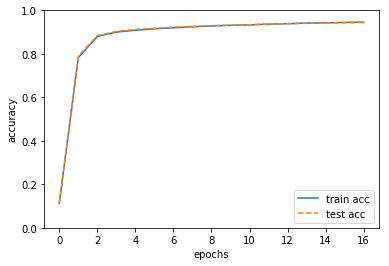

In [83]:
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(i, "train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

이 예에서는 1 에폭마다 모든 훈련 데이터와 시험 데이터에 대한 정확도를 계산하고, 그 결과를 기록한다. 정확도를 1에폭마다 계산하는 이유는 for 문 안에서 매번 계산하기에는 시간이 오래 거릴고, 또 그렇게까지 자주 기록할 필요가 없기 때문이다.

## 4.6 정리

신경망이 학습을 수행할 수 있도록 손실 함수라는 '지표'를 도입하였다. 이 손실 함수를 기준으로 그 값이 가장 작아지는 가중치 매개변수 값을 찾는 것이 신경망 학습의 목표이다. 또, 가능한 한 작은 손실 함수 값을 찾는 수렴으로 경사법을 소개했다. 경사법은 함수의 기울기를 이용하는 방법이다.

- 기계학습에서 사용하는 데이터셋은 훈련 데이터와 시험 데이터로 나눠 사용한다.
- 훈련 데이터로 학습한 모델의 범용 능력으로 시험 데이터로 평가한다.
- 신경망 학습은 손실 함수를 지표로, 손실 함수의 값이 작아지는 방향으로 가중치 매개변수를 갱신한다.
- 가중치 매개변수를 갱신할 때는 가중치 매개변수의 기울기를 기용하고, 기울어진 방향으로 가중치의 값을 갱신하는 작업을 반복한다.
- 아주 작은 값을 주었을 때 차분으로 미분하는 것이 수치 미분이다.
- 수치 미분을 이용해 가중치 매개변수의 기울기를 구할 수 있다.
- 수치 미분을 이용한 계산에는 시간이 걸리지만, 그 구현은 간단하다.